<a href="https://colab.research.google.com/github/ShreyKansal/ImageEncrytion_ChaosTheory/blob/main/4D_encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import random
from PIL import Image

# **Importing image**

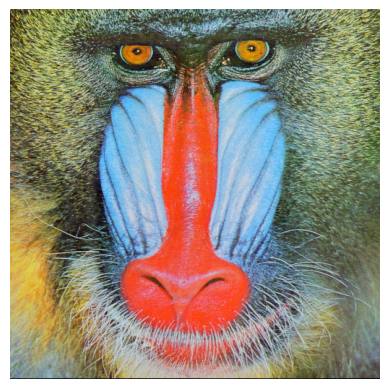

In [89]:
img = cv2.imread('baboon.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [90]:
height , width = img.shape[:2]
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  512
The width of the image is:  512


# **Random Vector Generation**

In [91]:
# Generate a random vector for the rows
VR = [np.random.randint(0, height) for _ in range(height)]
VC = [np.random.randint(0, width) for _ in range(width)]


# **Row-wise Pixel Permutation**

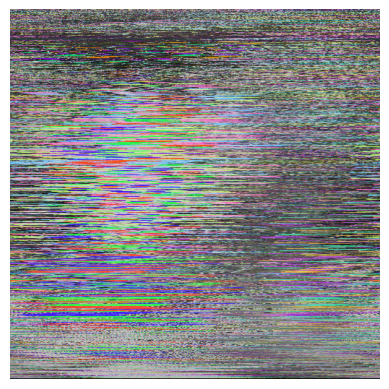

In [92]:
def rotate_array_right(arr, rotation_values):
    num_rows, num_cols = arr.shape[:2]

    # Ensure rotation_values has the same length as the number of rows in arr
    if len(rotation_values) != num_rows:
        raise ValueError("Number of rotation values must match the number of rows in the array.")

    for row_idx, num_rotations in enumerate(rotation_values):
        row = arr[row_idx, :]
        num_rotations = num_rotations % num_cols  # Ensure num_rotations is within range
        rotated_row = np.roll(row, -num_rotations)  # Rotate the row to the right
        arr[row_idx, :] = rotated_row

def rotate_array_left(arr, rotation_values):
    num_rows, num_cols = arr.shape[:2]

    # Ensure rotation_values has the same length as the number of rows in arr
    if len(rotation_values) != num_rows:
        raise ValueError("Number of rotation values must match the number of rows in the array.")

    for row_idx, num_rotations in enumerate(rotation_values):
        row = arr[row_idx, :]
        num_rotations = num_rotations % num_cols  # Ensure num_rotations is within range
        rotated_row = np.roll(row, num_rotations)  # Rotate the row to the left
        arr[row_idx, :] = rotated_row


# Rotate the image pixels to the right based on the rotation values
rotate_array_right(img, VR)

# Display the encrypted image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# **Column-wise Pixel Permutation**

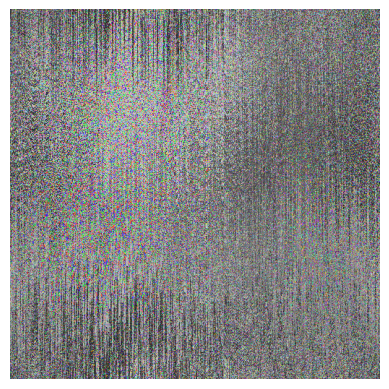

In [93]:
def rotate_col(arr, rotations):
 
# Set the number of rows and columns to 512
  nrows, ncols = arr.shape[:2]

# Rotate each column using the rotating value array
  for j in range(ncols):
    arr[:,j] = np.roll(arr[:,j], -rotations[j])


def rotate_col_re(arr, rotations):
 
# Set the number of rows and columns to 512
  nrows, ncols = arr.shape[:2]

# Rotate each column using the rotating value array
  for j in range(ncols):
    arr[:,j] = np.roll(arr[:,j], rotations[j])

rotate_col(img, VC)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



# **Channel Seperation**

In [94]:
# image= Image.open(img)
red, green, blue = cv2.split(img)
cv2.imwrite('red.png', red)
cv2.imwrite('green.png', green)
cv2.imwrite('blue.png', blue)
cv2.imwrite('green_1.png', green)


True

# **Interupt Calculation**

In [95]:
def calculate_value(image_path):
    image = Image.open(image_path)
    width, height = image.size
    pixels = list(image.getdata())
    pixel_sum = sum([sum(pixel)/3 for pixel in pixels])  # convert RGB tuples to integer values
    mean = pixel_sum / (width * height)
    value = mean / ((width * height) + pixel_sum)
    # print(width)
    # print(height)
    return value

image_path = 'baboon.png'
value = calculate_value(image_path)
print("Value:", value)


Value: 3.7847676815560303e-06


# **4D Chaotic Map**

In [96]:
def normalize(value, max_value):
    return value % max_value

def apply_4d_chaotic_equations(input_image_path, output_image_path, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w):
    input_image = Image.open(input_image_path).convert('L')
    width, height = input_image.size

    output_image = Image.new('L', (width, height))

    x = initial_x
    y = initial_y
    z = initial_z
    w = initial_w

    for x_pixel in range(width):
        for y_pixel in range(height):
            
            pixel_value = input_image.getpixel((x_pixel, y_pixel))

            x_new = normalize(a1 * x + y * z + a2 * w ** 2 + a3, 256)
            y_new = normalize(a4 * y - x * z + abs(w) * y, 256)
            z_new = normalize(x * y + a5 * z, 256)
            w_new = normalize(w + a6 * z, 256)

            x = x_new
            y = y_new
            z = z_new
            w = w_new

            transformed_pixel_value = pixel_value ^ int(x_new) ^ int(y_new) ^ int(z_new) ^ int(w_new)

            output_image.putpixel((x_pixel, y_pixel), transformed_pixel_value)
    output_image.save(output_image_path)

input_image_1 = 'red.png'
input_image_2 = 'green.png'
input_image_3 = 'blue.png'
input_image_4 = 'green_1.png'

output_image_1 = 'output_red.png'
output_image_2 = 'output_green.png'
output_image_3 = 'output_blue.png'
output_image_4 = 'output_green_1.png'

a1 = 12+value
a2 = 0.05+value
a3 = 0.4+value
a4 = 8+value
a5 = 45+value
a6 = 10+value

initial_x = 0.02+value
initial_y = 0.01+value
initial_z = 0.03+value
initial_w = 0.04+value

apply_4d_chaotic_equations(input_image_1, output_image_1, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_2, output_image_2, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_3, output_image_3, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_4, output_image_4, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)

In [97]:
def keygen(size):
    # Generate a random key of the specified size
    return np.random.bytes(size)

def logistic_map(x, r):
    # Compute the next value of the logistic map given the current value and the parameter r
    return r * x * (1 - x)

def chaotic_map(seed, r, n):
    # Generate a keystream using the logistic map with the specified seed and parameter r
    keystream = bytearray(n)
    x = seed
    for i in range(n):
        x = logistic_map(x, r)
        keystream[i] = int(256 * x)
    return np.array(keystream)

# Load the plaintext image
img = cv2.imread('lena_gray_512.tif', cv2.IMREAD_UNCHANGED)

# Generate a secret key
key = keygen(img.size)

# Generate a keystream using a chaotic map
seed = np.random.rand()
r = 3.9
keystream = chaotic_map(seed, r, img.size)

# Reshape the keystream to match the shape of the image
keystream = np.reshape(keystream, img.shape)

# Encrypt the image by XORing it with the keystream
ciphertext = cv2.bitwise_xor(img, keystream)

# Save the ciphertext and the secret key
cv2.imwrite('encrypted_image.png', ciphertext)

True

In [98]:
# Example usage
img1 =cv2.imread('encrypted_image.png', cv2.IMREAD_UNCHANGED) 
img2 = cv2.imread('output_blue.png', cv2.IMREAD_UNCHANGED)
img3 = cv2.imread('output_red.png', cv2.IMREAD_UNCHANGED)
img4 = cv2.imread('output_green.png', cv2.IMREAD_UNCHANGED)
img5 = cv2.imread('output_green_1.png', cv2.IMREAD_UNCHANGED)

img1_resized = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# XOR the resized img1 with the other images
result1 = cv2.bitwise_xor(img1_resized, img2)
result2 = cv2.bitwise_xor(img1_resized, img3)
result3 = cv2.bitwise_xor(img1_resized, img4)
result4 = cv2.bitwise_xor(img1_resized, img5)

cv2.imwrite('result1.jpg', result1)
cv2.imwrite('result2.jpg', result2)
cv2.imwrite('result3.jpg', result3)
cv2.imwrite('result4.jpg', result4)



True

In [99]:
red_channel = Image.open("result2.jpg")
green_channel = Image.open("result3.jpg")
blue_channel = Image.open("result1.jpg")
rgb_image = Image.merge("RGB", (red_channel, green_channel, blue_channel))
rgb_image.save("Merged_encrypted.png")

# **Decryption**

In [100]:
en_img = cv2.imread("Merged_encrypted.png")
red, green, blue = cv2.split(en_img)
cv2.imwrite('decrypt_red.png', red)
cv2.imwrite('decrypt_green.png', green)
cv2.imwrite('decrypt_blue.png', blue)
cv2.imwrite('decrypt_green_1.png', green)

True

In [101]:
img1 =cv2.imread('encrypted_image.png', cv2.IMREAD_UNCHANGED) 
img2 = cv2.imread('decrypt_blue.png', cv2.IMREAD_UNCHANGED)
img3 = cv2.imread('decrypt_red.png', cv2.IMREAD_UNCHANGED)
img4 = cv2.imread('decrypt_green.png', cv2.IMREAD_UNCHANGED)
img5 = cv2.imread('decrypt_green_1.png', cv2.IMREAD_UNCHANGED)

img1_resized = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# XOR the resized img1 with the other images
result1 = cv2.bitwise_xor(img1_resized, img2)
result2 = cv2.bitwise_xor(img1_resized, img3)
result3 = cv2.bitwise_xor(img1_resized, img4)
result4 = cv2.bitwise_xor(img1_resized, img5)

cv2.imwrite('decrypt_blue_result1.jpg', result1)
cv2.imwrite('decrypt_red_result2.jpg', result2)
cv2.imwrite('decrypt_green_result3.jpg', result3)
cv2.imwrite('decrypt_green_1_result4.jpg', result4)

True

In [102]:
def normalize(value, max_value):
    return value % max_value

def apply_4d_chaotic_equations(input_image_path, output_image_path, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w):
    input_image = Image.open(input_image_path).convert('L')
    width, height = input_image.size

    output_image = Image.new('L', (width, height))

    x = initial_x
    y = initial_y
    z = initial_z
    w = initial_w

    for x_pixel in range(width):
        for y_pixel in range(height):
            
            pixel_value = input_image.getpixel((x_pixel, y_pixel))

            x_new = normalize(a1 * x + y * z + a2 * w ** 2 + a3, 256)
            y_new = normalize(a4 * y - x * z + abs(w) * y, 256)
            z_new = normalize(x * y + a5 * z, 256)
            w_new = normalize(w + a6 * z, 256)

            x = x_new
            y = y_new
            z = z_new
            w = w_new

            transformed_pixel_value = pixel_value ^ int(x_new) ^ int(y_new) ^ int(z_new) ^ int(w_new)

            output_image.putpixel((x_pixel, y_pixel), transformed_pixel_value)
    output_image.save(output_image_path)

input_image_1 = 'decrypt_red_result2.jpg'
input_image_2 = 'decrypt_green_result3.jpg'
input_image_3 = 'decrypt_blue_result1.jpg'
input_image_4 = 'decrypt_green_1_result4.jpg'

output_image_1 = 'o_red.png'
output_image_2 = 'o_green.png'
output_image_3 = 'o_blue.png'
output_image_4 = 'o_green_1.png'

a1 = 12+value
a2 = 0.05+value
a3 = 0.4+value
a4 = 8+value
a5 = 45+value
a6 = 10+value

initial_x = 0.02+value
initial_y = 0.01+value
initial_z = 0.03+value
initial_w = 0.04+value

apply_4d_chaotic_equations(input_image_1, output_image_1, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_2, output_image_2, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_3, output_image_3, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)
apply_4d_chaotic_equations(input_image_4, output_image_4, a1, a2, a3, a4, a5, a6, initial_x, initial_y, initial_z, initial_w)

In [103]:
red_channel = Image.open("o_red.png")
green_channel = Image.open("o_green.png")
blue_channel = Image.open("o_blue.png")
rgb_image = Image.merge("RGB", (red_channel, green_channel, blue_channel))
rgb_image.save("Merged.png")

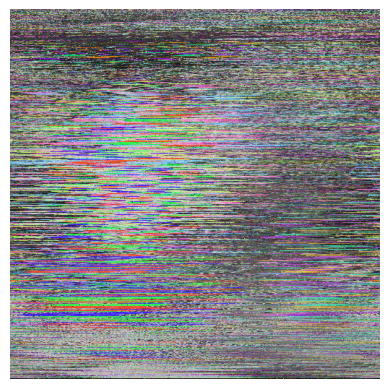

In [104]:
merged=cv2.imread("Merged.png")
rotate_col_re(merged, VC)
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

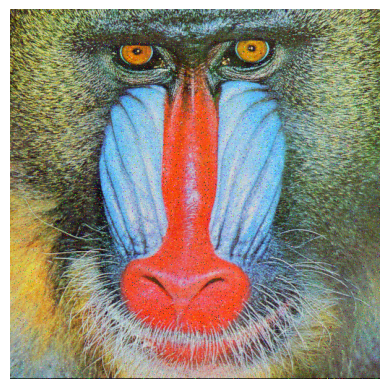

In [105]:
# Rotate the image pixels to the left based on the same rotation values to decrypt
rotate_array_left(merged, VR)

# Display the decrypted image
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# **Analysis**